### 2. Importing the relevant libraries

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score,roc_auc_score,ConfusionMatrixDisplay,confusion_matrix , classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
# from xgboost import XGBClassifier
import joblib




### 3. Data Understanding

In [57]:
# loading the datasets
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")

In [58]:
# Creating a copy of the dataset to work with.
data = df.copy()
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [59]:
# checking the shape of the data
(data.shape)

(3333, 21)

In [60]:
print(f"Data has {data.shape[0]} rows and {data.shape[1]} columns")

Data has 3333 rows and 21 columns


In [61]:
# checking for information about the data Frame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [62]:
# Converting area code to object as it takes no mathematical significance.
data['area code'] = data['area code'].astype('object')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   object 
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [64]:
# checking for the unique values in the data
for i in data.columns:
    print(f"Unique values in {i} are {data[i].nunique()}")

Unique values in state are 51
Unique values in account length are 212
Unique values in area code are 3
Unique values in phone number are 3333
Unique values in international plan are 2
Unique values in voice mail plan are 2
Unique values in number vmail messages are 46
Unique values in total day minutes are 1667
Unique values in total day calls are 119
Unique values in total day charge are 1667
Unique values in total eve minutes are 1611
Unique values in total eve calls are 123
Unique values in total eve charge are 1440
Unique values in total night minutes are 1591
Unique values in total night calls are 120
Unique values in total night charge are 933
Unique values in total intl minutes are 162
Unique values in total intl calls are 21
Unique values in total intl charge are 162
Unique values in customer service calls are 10
Unique values in churn are 2


### 3. Data Cleaning.

In [65]:
#checking for duplicates in the data
print(data.duplicated().sum())

0


In [66]:
# checking for missing values in the data
print(data.isnull().sum())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


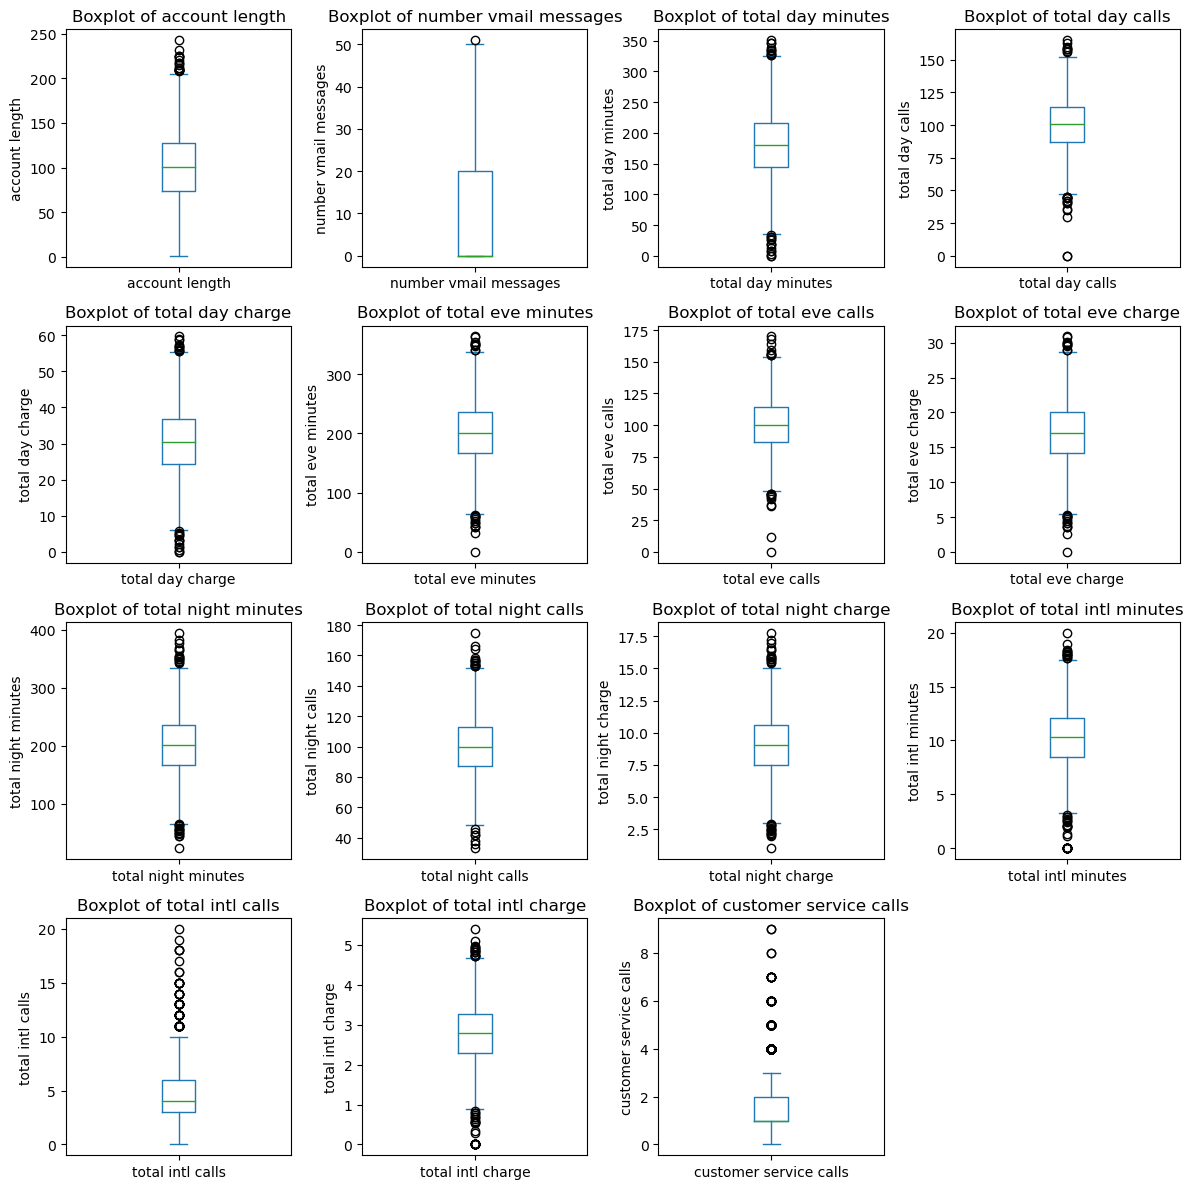

In [67]:
# checking for outliers in numerical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
num_plots = len(numeric_cols.columns)
num_rows = (num_plots + 3) // 4 # 4 columns
num_cols = min(num_plots, 4)  

plt.figure(figsize=(12, 3 * num_rows))

for i, col in enumerate(numeric_cols.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    data[col].plot(kind='box')
    plt.title(f'Boxplot of {col}')  # Set title
    plt.ylabel(col)  # Set y-label

plt.tight_layout()
plt.show()

##### From the above, it is evident that the data above is clean; contains no duplicates and have no missing data. While checking for outliers, we notice that their is no signitficant oultier.

### 4. Data statistics

In [68]:
# Summary statistic
data.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Explotary Data Analysis

#### Univariate Analysis

 These classification problem project seeks to predict the churn of customers. The target variable is "churn" which is a binary variable. Assesing the distribution of the target variable to see if the data is balanced or not.

In [69]:
# checking for the distribution of the target variable "churn"
data['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

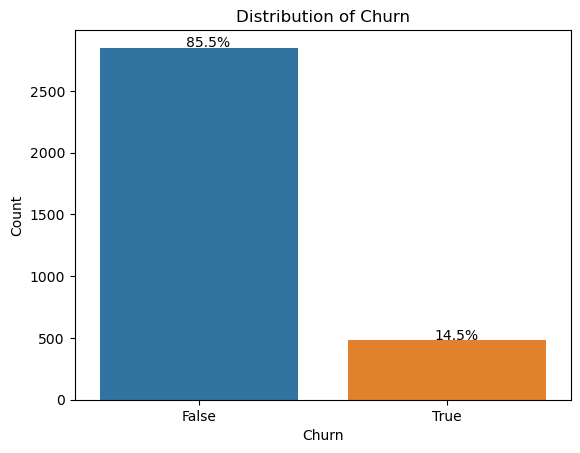

In [70]:
# Plotting the distribution of the target variable
ax = sns.countplot(x='churn', data=data)
total = len(data['churn'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.show()

It is evident that from the 3,333 customers, 483 customers have churned from SyriaTel. This is approximately 14.5 % of the total customers indicating a loss in their customer base.
From the distribution as shown in "Distribution of churn" graph above, their is an uneven distribution of observations with 85.5% of the data belonging to the False class while 14.5% belonging to the true class.

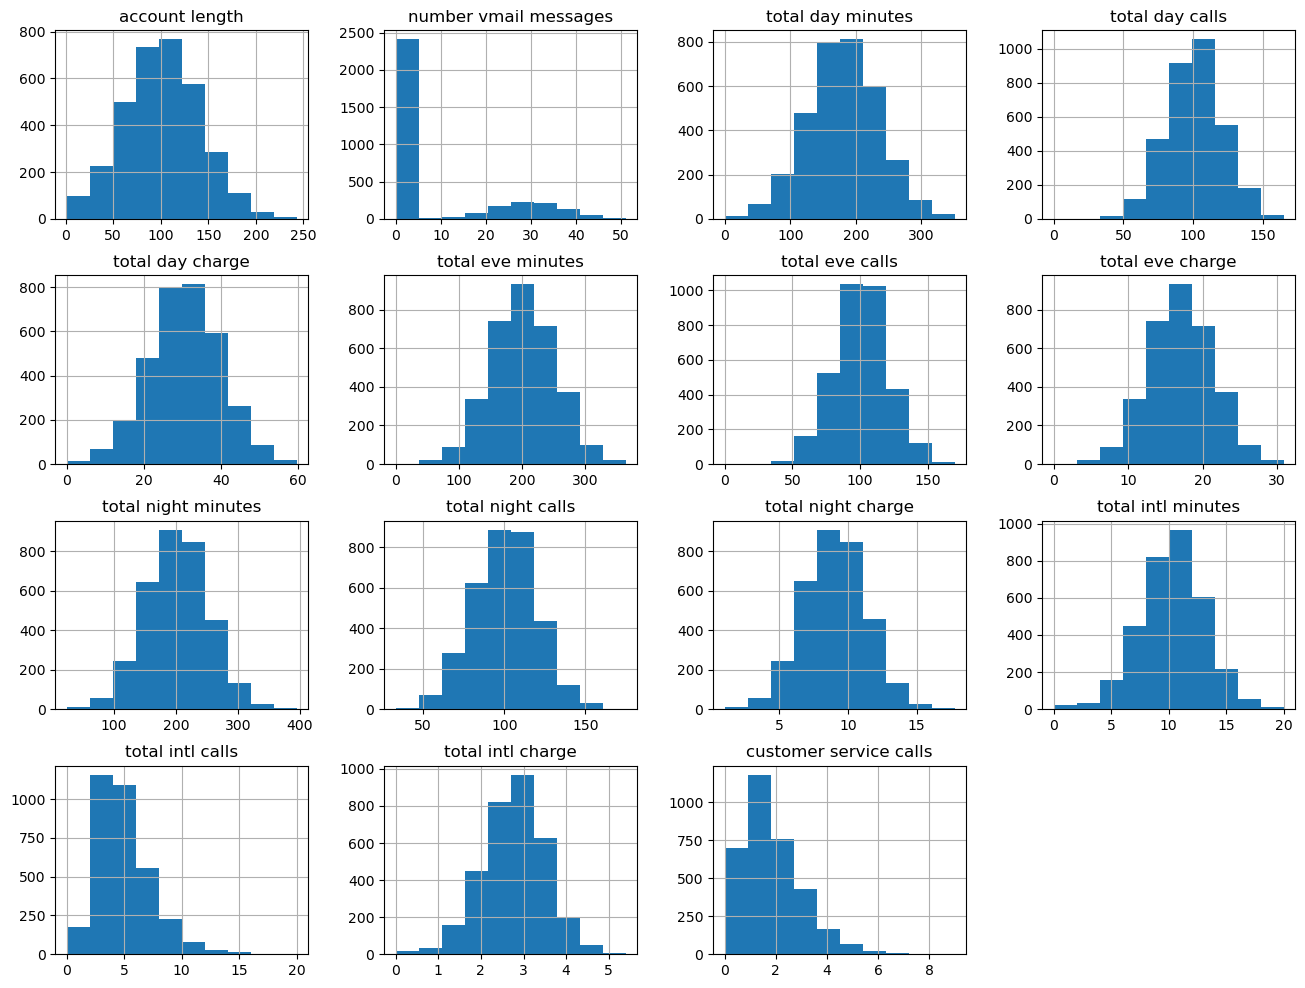

In [71]:
# distribution of features
data.drop(columns='churn').hist(figsize=(16,12));

### Multivariate analysis

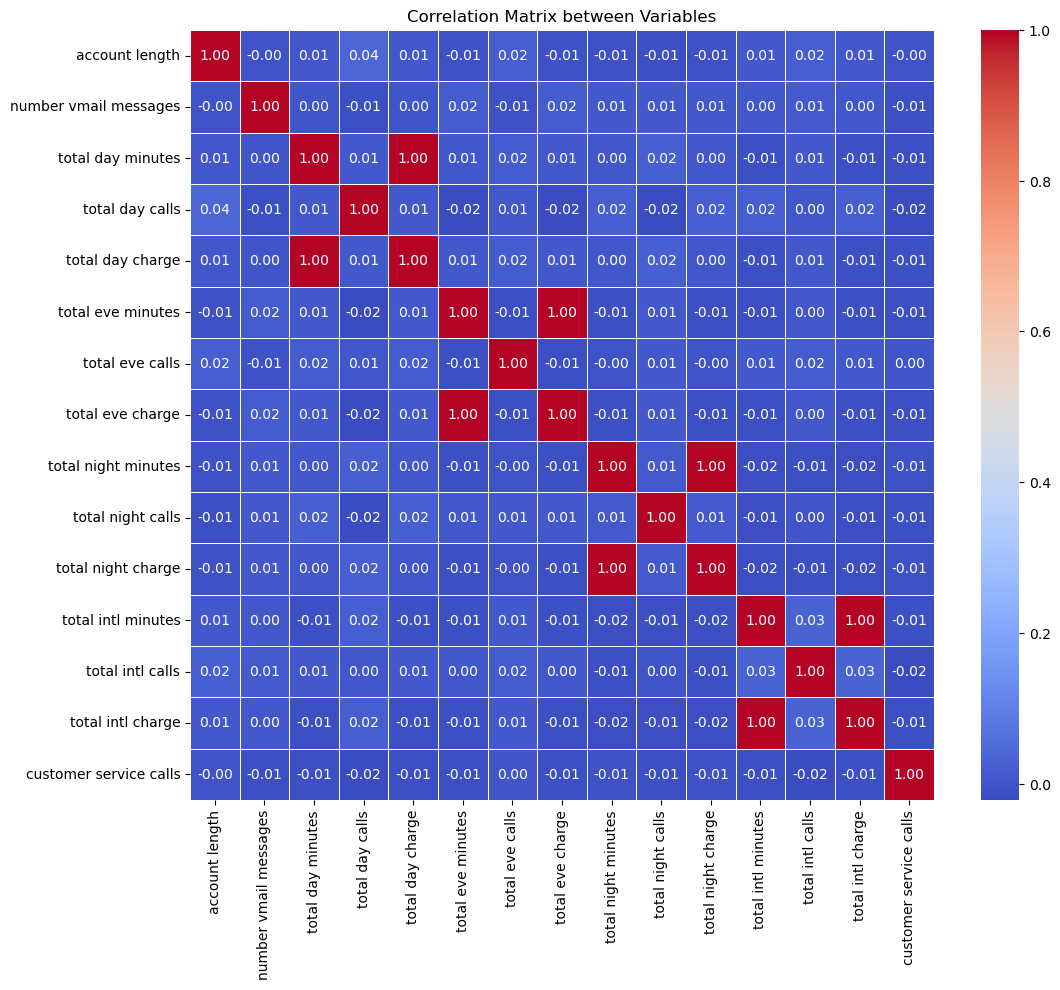

In [72]:
# Compute the correlation matric for the numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
corr_matrix = data[numeric_columns].corr()

# Generate the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Variables')
plt.show()

While most of the features in the dataset do not show significant correlation, there are some pairs of features that exhibit perfect positive correlation. This are:
- Total day charge and Total day minutes,
- Total eve charge and Total eve minutes,
- Total night charge and Total night minutes,
- Total int charge and Total int minutes.



### Data preparation

In [76]:
# Handling the multicollinearity
# Drop the highly correlated columns
def drop_highly_correlated_features(data, threshold=0.9):
    # Create correlation matrix
    corr_matrix = data.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return to_drop

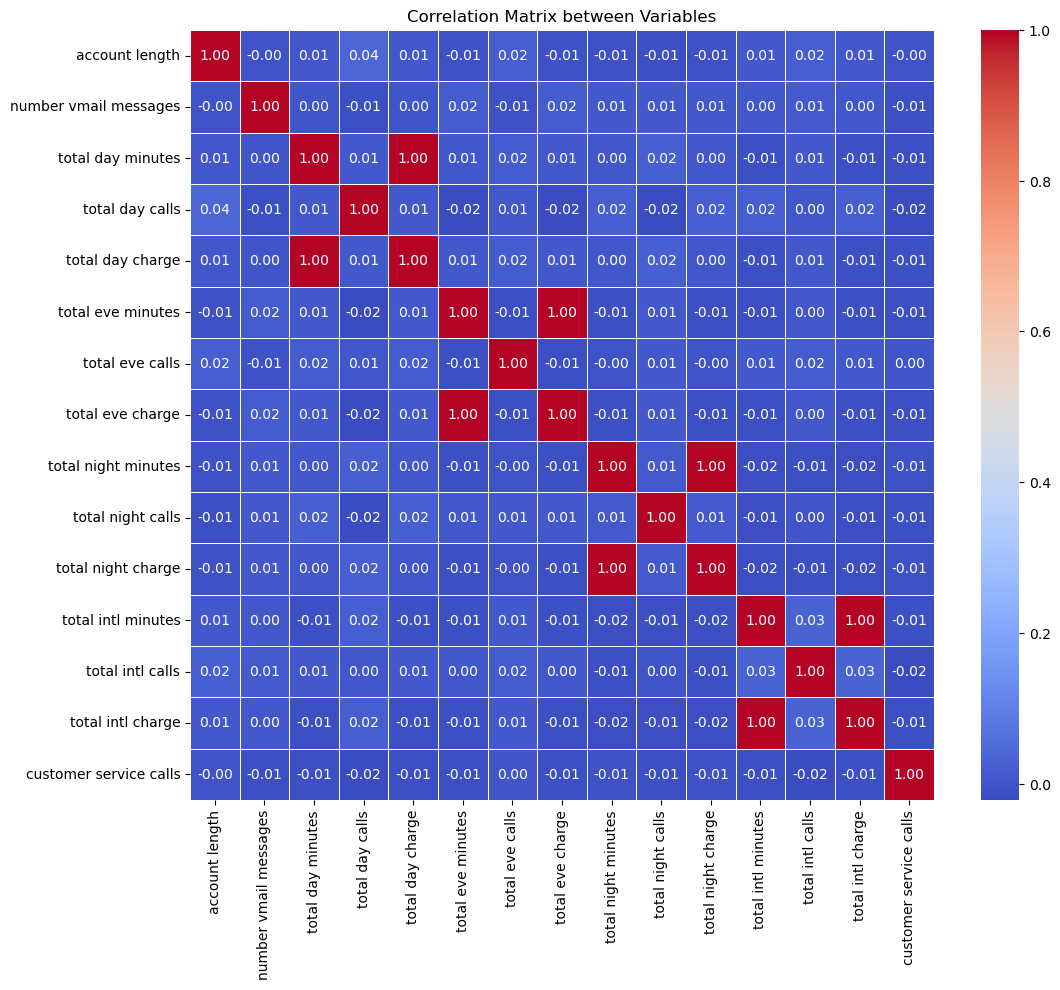

In [77]:
# Compute the correlation matric for the numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
corr_matrix = data[numeric_columns].corr()

# Generate the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Variables')
plt.show()